<a href="https://colab.research.google.com/github/tomaszpionka/ds-project/blob/main/wum3zaoczne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wczytaj poniższe dane "Street View House Number"

In [6]:
from torchvision import transforms
from torchvision import datasets
import torch

transform = transforms.Compose([#transformacja pozwalająca zamienić oryginalny format fdanych PIL Image na pyTorchowy Tensor
    transforms.ToTensor()
])

svhn_data_train=datasets.SVHN("svhn", split='train', transform=transform, target_transform=None, download=True)
svhn_data_test=datasets.SVHN("svhn", split='test', transform=transform, target_transform=None, download=True)



data_loader_train = torch.utils.data.DataLoader(svhn_data_train,
                                          batch_size=16,
                                          shuffle=True,
                                          )


data_loader_test = torch.utils.data.DataLoader(svhn_data_test,
                                          batch_size=16,
                                          shuffle=False,
                                          )

Using downloaded and verified file: svhn/train_32x32.mat
Using downloaded and verified file: svhn/test_32x32.mat


First data sample in the first batch:  tensor([[[0.3059, 0.2941, 0.2745,  ..., 0.2078, 0.2039, 0.2039],
         [0.3059, 0.2863, 0.2588,  ..., 0.1765, 0.1882, 0.2000],
         [0.3020, 0.2784, 0.2431,  ..., 0.1333, 0.1725, 0.2078],
         ...,
         [0.3098, 0.2902, 0.2549,  ..., 0.2000, 0.2706, 0.3216],
         [0.3020, 0.2824, 0.2510,  ..., 0.1882, 0.2392, 0.2745],
         [0.2980, 0.2784, 0.2471,  ..., 0.1804, 0.2157, 0.2392]],

        [[0.2824, 0.2627, 0.2392,  ..., 0.2275, 0.2275, 0.2275],
         [0.2784, 0.2549, 0.2235,  ..., 0.2000, 0.2196, 0.2314],
         [0.2706, 0.2431, 0.2039,  ..., 0.1686, 0.2157, 0.2510],
         ...,
         [0.2706, 0.2549, 0.2275,  ..., 0.2078, 0.2824, 0.3373],
         [0.2588, 0.2510, 0.2275,  ..., 0.1961, 0.2510, 0.2863],
         [0.2549, 0.2471, 0.2235,  ..., 0.1843, 0.2235, 0.2471]],

        [[0.3412, 0.3412, 0.3451,  ..., 0.3765, 0.3647, 0.3529],
         [0.3490, 0.3490, 0.3451,  ..., 0.3569, 0.3608, 0.3608],
         [0.3569, 0

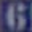

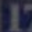

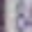

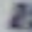

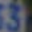

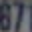

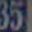

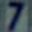

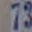

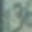

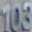

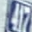

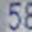

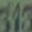

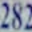

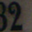

In [7]:
%matplotlib inline

from torchvision.transforms import ToPILImage
from IPython.display import Image
to_img = ToPILImage()

# Checking the dataset
for images, labels in data_loader_train: 
    print("First data sample in the first batch: ",images[0]) 
    print("First label in the first batch:", labels[0])
    print('Data batch dimensions:', images.shape)
    print('Label dimensions:', labels.shape)
    break
print(labels)
for i in images:
  display(to_img(i))

W PyTorch zaprojektuj wielowarstwową sieć neuronową do rozpoznawania cyfr z powyższego zbioru danych. 

* Wykorzystaj warstwy Linear oraz odpowiednie funkcje aktywacji (np ReLu). Na razie nie wykorzystuj warstw konwolucyjnych etc. 

* Zwróć uwagę na wymiar danych wejściowych i dokonaj odpowiedniego przekształcenia. Obecnie dane są tensorem o 3 wymiarach, a sieć FF może wczytać tensor(tablice) jednowymiarową. (+1 wymiar reprezentujący batch)


* Wykonaj trenowanie na mini-batchach, czyli krok akualizacji wag następuje po obliczeniu kosztu dla pojedynczego mini batcha.

* jako funkcję kosztu użyj criterion = nn.CrossEntropyLoss(). Pamiętaj że implementacja tej funkcji zawiera już funkcję softmax, a zatem wyjściem sieci powinna być ostatnia warstwa bez funkcji aktywacji. (Zamiennie można użyć NNLoss, a wtedy po ostatniej warstwie Linear użyć funkcji Softmax)

* Zapisz wartość funkcji kosztu co 50 krok uczenia(co 50 minibatchy), aby następnie po wytrenowaniu sici wyświetlić wykres loss od liczby iteracji po mini-batchach. 

* aby wyznaczyć klasę dla obserwacji (jednej lub całego mini batcha):  _, predicted_labels = torch.max(network_output, 1),gdzie network_output to wyjście sieci, 1 to wymiar po którym jest liczony maksymalny indeks)

* Po każdej epoce wypisz dokładność modelu na zbiorze treningowym i testowym. (dokładnośc = liczba poprawnie zaklasyfikowanych obserwacji / liczba obserwacji)

* Postaraj się otrzymac około 75% dokładności na zbiorze testowym

* Jeśli chcesz wykonywać obliczenia na gpu pamiętaj o :
  * dodaniu wspomagania gpu do noteboooka Runtime->Change runtime type.
  * zapisaniu modelu oraz danych wejściowych i etykiet na gpu np:

    po utworzeniu instancji modelu: model=model.to("cuda")
    x=x.to("cuda")
    y=y.to("cuda")

Przydatne linki:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py


In [13]:
# class MultilayerPerceptron(torch.nn.Module):

#     def __init__(self, input_dim, output_dim):
#         super(MultilayerPerceptron, self).__init__()
      
        
#     def forward(self, x):
        

    
# torch.manual_seed(123)
# model = MultilayerPerceptron(input_dim=  ,
#                              output_dim=10)

# model = model.to('cuda')

# optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
# import numpy as np
# import torch.nn.functional as F
# import torch

    

# for epoch in range(30): #liczba epok
#     model.train()
#     for batch_idx, (inputs, targets) in enumerate(data_loader_train):
        
#         #uruchomic model i zapisac wyjscie siec
#         # wybrac etykiete
#         #obliczyc loss, gradient i wykonac trenowanie
        
#         if batch_idx % 50==0:
#             model.eval()
#             print ('Epoch: %03d | Batch %03d/%03d | Cost: %.4f' 
#                    %(epoch+1, batch_idx, 
#                      len(data_loader_train), cost))

    
#     print('Epoch: %03d training accuracy: %.2f%%' % (
#               epoch+1, accuracy)
#     print('Epoch: %03d test accuracy: %.2f%%' % (
#               epoch+1, accuracy)


Working on device=cuda
Using downloaded and verified file: svhn/train_32x32.mat
Using downloaded and verified file: svhn/test_32x32.mat
Epoch [1/30], loss: 2.2336, test accuracy: 0.20


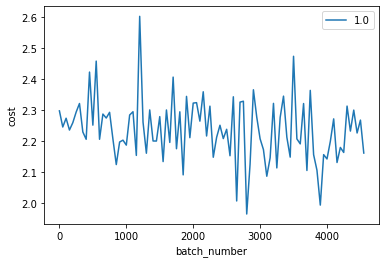

Epoch [2/30], loss: 1.9336, test accuracy: 0.38


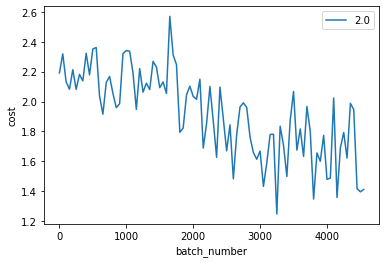

Epoch [3/30], loss: 1.4748, test accuracy: 0.57


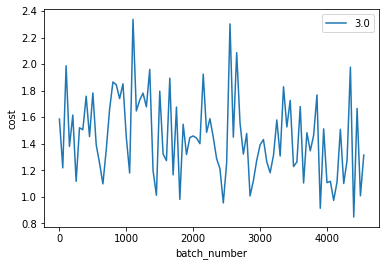

Epoch [4/30], loss: 1.2170, test accuracy: 0.63


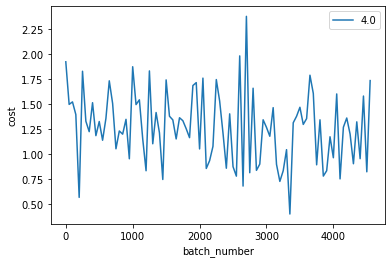

Epoch [5/30], loss: 1.0758, test accuracy: 0.61


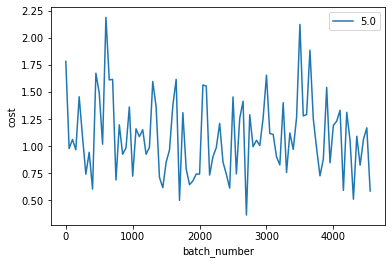

Epoch [6/30], loss: 0.9759, test accuracy: 0.68


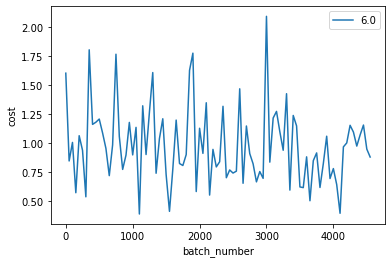

Epoch [7/30], loss: 0.8964, test accuracy: 0.67


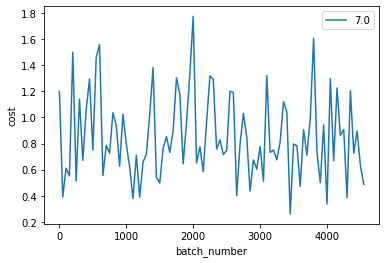

Epoch [8/30], loss: 0.8356, test accuracy: 0.71


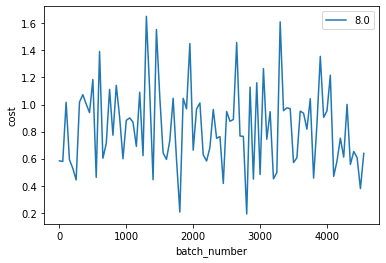

Epoch [9/30], loss: 0.7843, test accuracy: 0.73


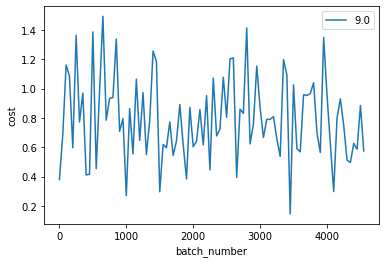

Epoch [10/30], loss: 0.7435, test accuracy: 0.72


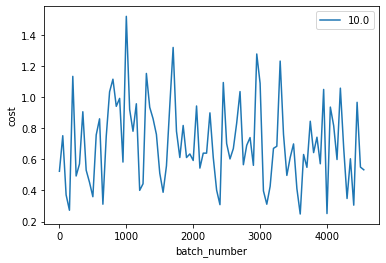

Epoch [11/30], loss: 0.7033, test accuracy: 0.76


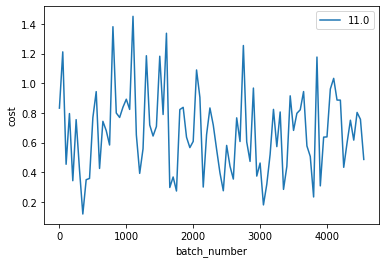

Epoch [12/30], loss: 0.6742, test accuracy: 0.76


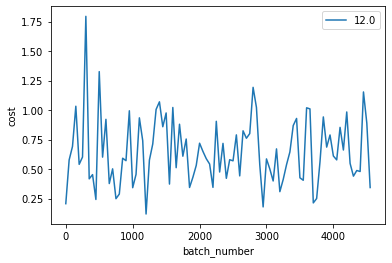

Epoch [13/30], loss: 0.6466, test accuracy: 0.78


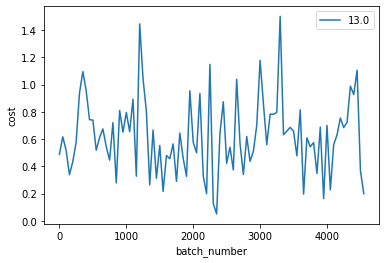

Epoch [14/30], loss: 0.6230, test accuracy: 0.77


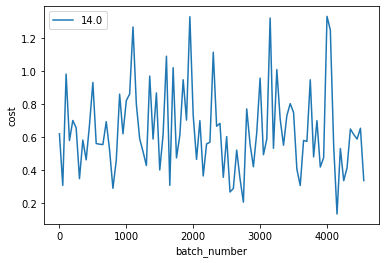

Epoch [15/30], loss: 0.5981, test accuracy: 0.73


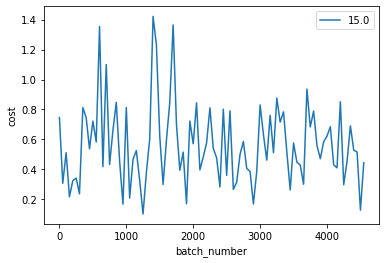

Epoch [16/30], loss: 0.5783, test accuracy: 0.77


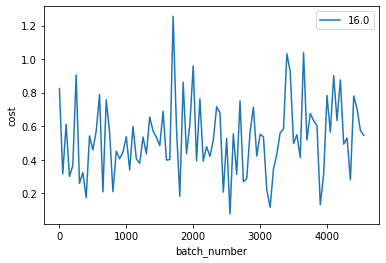

Epoch [17/30], loss: 0.5606, test accuracy: 0.78


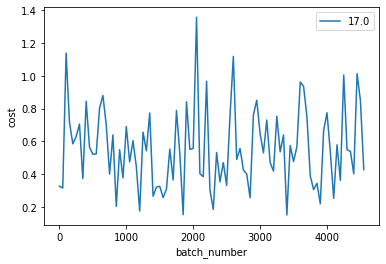

Epoch [18/30], loss: 0.5450, test accuracy: 0.80


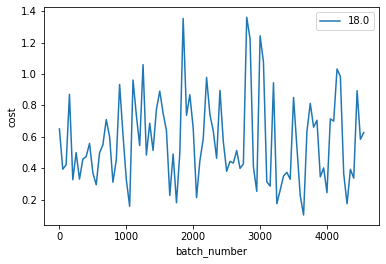

Epoch [19/30], loss: 0.5300, test accuracy: 0.80


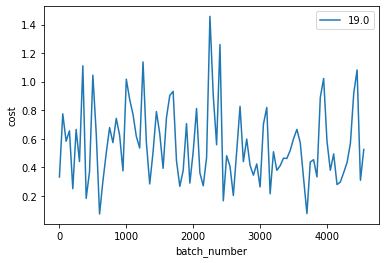

Epoch [20/30], loss: 0.5143, test accuracy: 0.78


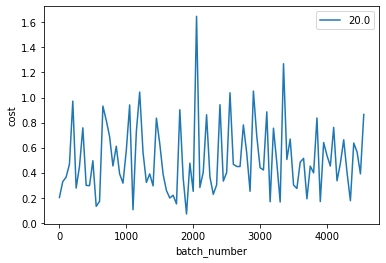

Epoch [21/30], loss: 0.5022, test accuracy: 0.79


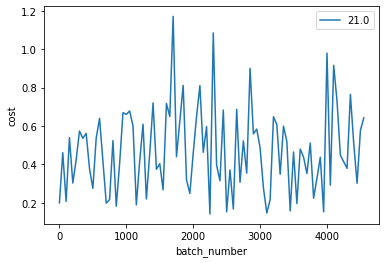

Epoch [22/30], loss: 0.4870, test accuracy: 0.81


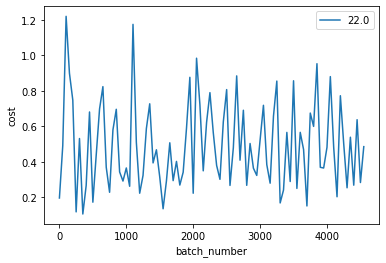

Epoch [23/30], loss: 0.4749, test accuracy: 0.77


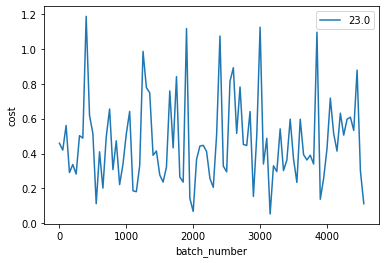

Epoch [24/30], loss: 0.4626, test accuracy: 0.78


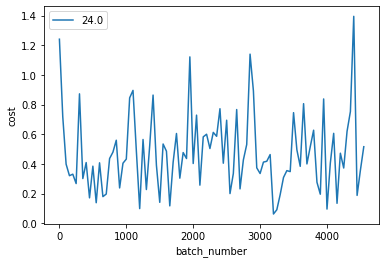

Epoch [25/30], loss: 0.4506, test accuracy: 0.78


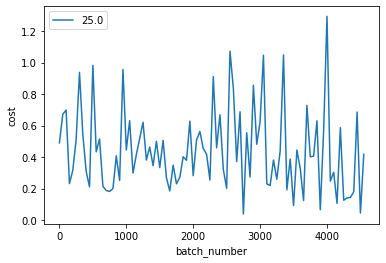

Epoch [26/30], loss: 0.4410, test accuracy: 0.79


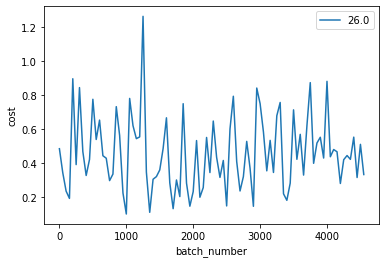

Epoch [27/30], loss: 0.4286, test accuracy: 0.79


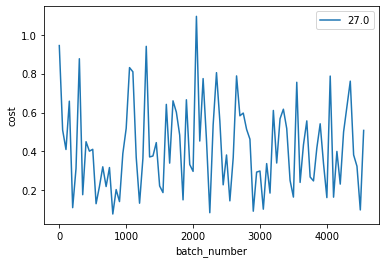

Epoch [28/30], loss: 0.4217, test accuracy: 0.80


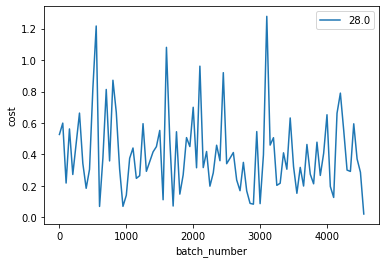

Epoch [29/30], loss: 0.4110, test accuracy: 0.82


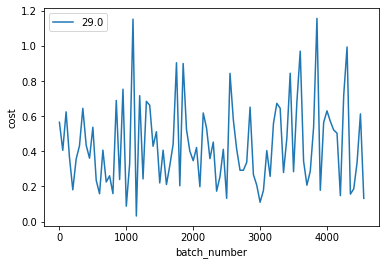

Epoch [30/30], loss: 0.4044, test accuracy: 0.79


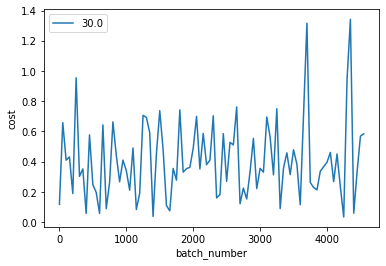

In [50]:
import numpy as np
import torch.nn as nn
from torchvision import transforms
from torchvision import datasets
import torch

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(columns=['epoch', 'batch', 'cost'])

torch.manual_seed(12)
torch.cuda.manual_seed(12)
np.random.seed(12)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Working on device={device}')

input_size = 3*32*32
num_classes = 10
num_epochs = 30
batch_size = 16
learning_rate = 0.01

transform = transforms.Compose([#transformacja pozwalająca zamienić oryginalny format fdanych PIL Image na pyTorchowy Tensor
    transforms.ToTensor()
])

svhn_data_train=datasets.SVHN("svhn", split='train', transform=transform, target_transform=None, download=True)
svhn_data_test=datasets.SVHN("svhn", split='test', transform=transform, target_transform=None, download=True)



data_loader_train = torch.utils.data.DataLoader(svhn_data_train,
                                          batch_size=16,
                                          shuffle=True,
                                          )


data_loader_test = torch.utils.data.DataLoader(svhn_data_test,
                                          batch_size=16,
                                          shuffle=False,
                                          )



class MultilayerNeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultilayerNeuralNet, self).__init__()
        hidden1 = 512
        hidden2 = 256
        hidden3 = 128
        self.fc1 = nn.Linear(input_size, hidden1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2, hidden3)
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(hidden3, num_classes)

    def forward(self, x):
        state = self.fc1(x)
        state = self.relu1(state)
        state = self.fc2(state)
        state = self.relu2(state)
        state = self.fc3(state)
        state = self.relu3(state)
        state = self.output(state)
        return state

model = MultilayerNeuralNet(input_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    epoch_loss = 0
    model.train()
    for batch_idx, (inputs, targets) in enumerate(data_loader_train):
        images = inputs.reshape(-1, input_size).to(device)
        labels = targets.to(device)
        
        prediction = model(images)
        loss = criterion(prediction, labels)
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % 50==0:
            model.eval()
            df = df.append({'epoch': epoch+1, 'batch': batch_idx, 'cost': loss.item()}, ignore_index=True)  

    epoch_loss = epoch_loss / len(data_loader_train)

    with torch.no_grad():
          correct = 0
          total = 0

          for images, labels in data_loader_test:
              images = images.reshape(-1, input_size).to(device)
              labels = labels.to(device)

              prediction = model(images)

              _, predicted = torch.max(prediction.data, 1)
              total += labels.size(0)
              correct += (predicted == labels).sum().item()

          accuracy = correct/total
          print(f'Epoch [{epoch+1}/{num_epochs}], loss: {epoch_loss:.4f}, test accuracy: {accuracy:.2f}')
          df_epoch = df[(df["epoch"] == epoch+1)]
          fig, ax = plt.subplots()
          for label, grp in df_epoch.groupby('epoch'):
              grp.plot(x = 'batch', y = 'cost', ax = ax, label = label)
          plt.xlabel('batch_number')
          plt.ylabel('cost')
          plt.show()